In [1]:

import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats   
import seaborn as sns

df_data_311 = pd.read_csv('./NYC311data.csv')
#df_data_311.head()

# Make a new dataset by choosing only data where BOROUGH name is BRONX.


df_311_BX = df_data_311[df_data_311.borough == "BRONX"]
df_311_BX.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-28T20:26:11.000,45492325,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,NaN,RESIDENTIAL BUILDING,Open
3,2020-01-28T18:07:16.000,45493438,PLUMBING,10454.0,514 EAST 138 STREET,EAST 138 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.807416,-73.918919,NaN,RESIDENTIAL BUILDING,Open
4,2020-01-28T14:10:04.000,45492347,HEAT/HOT WATER,10463.0,2800 BAILEY AVENUE,BAILEY AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.873356,-73.905554,NaN,RESIDENTIAL BUILDING,Open
7,2020-01-28T07:27:16.000,45493379,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,NaN,RESIDENTIAL BUILDING,Open
8,2020-01-28T07:21:15.000,45494446,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,NaN,RESIDENTIAL BUILDING,Open


In [2]:

df_data_BX = pd.read_csv(./BXdata.csv)
df_data_BX.head()

# The recommended fields are Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, 
# OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.

df_data_BX_update = df_data_BX[["Address", "BldgArea", "BldgDepth", "BuiltFAR", "CommFAR", "FacilFAR", "Lot", "LotArea", "LotDepth", "NumBldgs", "NumFloors", 
             "OfficeArea", "ResArea", "ResidFAR", "RetailArea", "YearBuilt", "YearAlter1", "ZipCode", "YCoord", "XCoord"]]

df_data_BX_update.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86348 entries, 0 to 89847
Data columns (total 21 columns):
Number of Complaints    4955 non-null float64
Address                 86348 non-null object
BldgArea                86348 non-null int64
BldgDepth               86348 non-null float64
BuiltFAR                86348 non-null float64
CommFAR                 86348 non-null float64
FacilFAR                86348 non-null float64
Lot                     86348 non-null int64
LotArea                 86348 non-null int64
LotDepth                86348 non-null float64
NumBldgs                86348 non-null int64
NumFloors               86348 non-null float64
OfficeArea              86348 non-null int64
ResArea                 86348 non-null int64
ResidFAR                86348 non-null float64
RetailArea              86348 non-null int64
YearBuilt               86348 non-null int64
YearAlter1              86348 non-null int64
ZipCode                 86331 non-null float64
YCoord            

In [3]:
# merge HEATING and HEAT/HOT WATER as one feature
df_311_BX['complaint_type'] = np.where(df_311_BX['complaint_type']=='HEATING','HEAT/HOT WATER',df_311_BX['complaint_type'])
df_complaint_data = df_311_BX.loc[df_311_BX['complaint_type']=='HEAT/HOT WATER'].dropna()

# dataset named df_complaint_data has all HEAT/HOT WATER incidents from BRONX
df_complaint_data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
44,2020-01-28T06:15:40.000,45493340,HEAT/HOT WATER,10451.0,825 GERARD AVENUE,GERARD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.825866,-73.925913,2020-01-28T21:32:04.000,RESIDENTIAL BUILDING,Closed
66,2020-01-28T03:55:06.000,45493390,HEAT/HOT WATER,10458.0,2605 MARION AVENUE,MARION AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.863839,-73.891616,2020-01-28T18:23:50.000,RESIDENTIAL BUILDING,Closed
69,2020-01-28T11:32:22.000,45494463,HEAT/HOT WATER,10468.0,2955 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.872514,-73.887534,2020-01-28T18:23:49.000,RESIDENTIAL BUILDING,Closed
124,2020-01-28T10:58:54.000,45496482,HEAT/HOT WATER,10458.0,2605 MARION AVENUE,MARION AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.863839,-73.891616,2020-01-28T18:23:50.000,RESIDENTIAL BUILDING,Closed
281,2020-01-28T06:08:34.000,45494432,HEAT/HOT WATER,10467.0,3467 DEKALB AVENUE,DEKALB AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.881713,-73.881013,2020-01-28T14:54:45.000,RESIDENTIAL BUILDING,Closed


In [4]:
# To merge the two datasets based on address:
df_311_BX["incident_address"].isnull().sum()

#drop the row which has no incident_address
df_311_BX.dropna(subset = ["incident_address"], axis = 0, inplace=True)

df_311_BX["complaint_type"].value_counts()

df_311_BX_HEAT = df_311_BX[df_311_BX.complaint_type == "HEAT/HOT WATER"]

df_311_BX_HEAT["complaint_type"].value_counts()

df_311_BX_address = df_311_BX_HEAT[["incident_address", "complaint_type"]]
df_311_BX_address.head()

new_df = df_311_BX_address.groupby(["incident_address"])

type(new_df.count())
new_df2 = new_df.count()

new_df2.columns = ["Number of Complaints"]
new_df2.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Number of Complaints
incident_address,
1 ADRIAN AVENUE,18
1 EAST 198 STREET,6
1 EAST 169 STREET,1
1 EAST 198 STREET,1
1 METROPOLITAN OVAL,2


In [5]:
df_data_BX_update["Address"].value_counts().head()



SHORE DRIVE           42
PALISADE AVENUE       37
WHITE PLAINS ROAD     35
PARK AVENUE           35
BRUCKNER BOULEVARD    34
Name: Address, dtype: int64

In [6]:
# drop all address entries that has occured multiple times in df_data_BX_update
df_data_BX_update.drop_duplicates(subset="Address", keep=False, inplace=True)

df_data_BX_update['Address'].value_counts().head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


2749 CRESTON AVENUE      1
987 FOX STREET           1
3039 GUNTHER AVENUE      1
3231 WATERBURY AVENUE    1
3658 WALDO AVENUE        1
Name: Address, dtype: int64

In [7]:
# merge the two dataframes
df_final = pd.merge(new_df2, df_data_BX_update, left_index=True, right_on="Address", how="right")
df_final.head()

,Number of Complaints,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,NaN,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,...,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,NaN,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,...,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,NaN,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,...,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,3.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,...,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,NaN,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,...,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [8]:
df_final["Occurence"] = df_final["Number of Complaints"]
df_final["Occurence"].replace(np.nan, 0.0, inplace = True)
df_final['Occurence'] = np.where(df_final['Occurence'] >  0, True, False)
df_final.head()

,Number of Complaints,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,Occurence
0,NaN,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,False
1,NaN,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,...,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,False
2,NaN,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,...,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,False
3,3.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,True
4,NaN,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,False


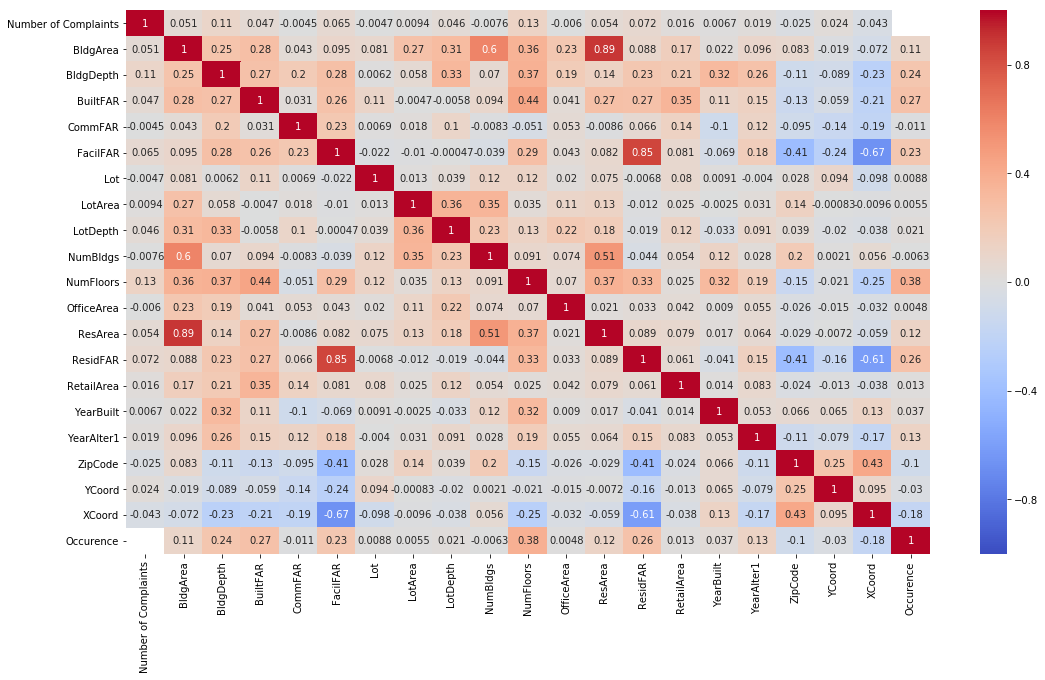

In [50]:
plt.figure(figsize=(18,10))
cor = df_final.corr()
sns.heatmap(cor, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [9]:
df_final["Number of Complaints"].replace(np.nan, 0.0, inplace = True)
df_final['YCoord']  =  df_final.YCoord.fillna('00.00').astype(float)
df_final['XCoord']  =  df_final.XCoord.fillna('00.00').astype(float)
df_final['ZipCode']    =  df_final.ZipCode.fillna('00.00').astype(float)
df_final.isnull().sum()


Number of Complaints    0
Address                 0
BldgArea                0
BldgDepth               0
BuiltFAR                0
CommFAR                 0
FacilFAR                0
Lot                     0
LotArea                 0
LotDepth                0
NumBldgs                0
NumFloors               0
OfficeArea              0
ResArea                 0
ResidFAR                0
RetailArea              0
YearBuilt               0
YearAlter1              0
ZipCode                 0
YCoord                  0
XCoord                  0
Occurence               0
dtype: int64

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86348 entries, 0 to 89847
Data columns (total 22 columns):
Number of Complaints    86348 non-null float64
Address                 86348 non-null object
BldgArea                86348 non-null int64
BldgDepth               86348 non-null float64
BuiltFAR                86348 non-null float64
CommFAR                 86348 non-null float64
FacilFAR                86348 non-null float64
Lot                     86348 non-null int64
LotArea                 86348 non-null int64
LotDepth                86348 non-null float64
NumBldgs                86348 non-null int64
NumFloors               86348 non-null float64
OfficeArea              86348 non-null int64
ResArea                 86348 non-null int64
ResidFAR                86348 non-null float64
RetailArea              86348 non-null int64
YearBuilt               86348 non-null int64
YearAlter1              86348 non-null int64
ZipCode                 86348 non-null float64
YCoord           

In [11]:
df_compare = df_final[["Number of Complaints","YearBuilt","BldgArea","BldgDepth","NumBldgs","NumFloors","OfficeArea"]]
df_compare.head()

df_compare = df_compare[df_compare.YearBuilt != 0]
df_compare.corr(method="pearson")

,Number of Complaints,YearBuilt,BldgArea,BldgDepth,NumBldgs,NumFloors,OfficeArea
Number of Complaints,1.000000,-0.022251,0.048158,0.096072,-0.005047,0.154155,-0.001365
YearBuilt,-0.022251,1.000000,0.023715,-0.026648,-0.039164,0.059168,0.013410
BldgArea,0.048158,0.023715,1.000000,0.259427,0.603890,0.378481,0.228962
BldgDepth,0.096072,-0.026648,0.259427,1.000000,0.032773,0.296440,0.200371
NumBldgs,-0.005047,-0.039164,0.603890,0.032773,1.000000,0.055692,0.073738
NumFloors,0.154155,0.059168,0.378481,0.296440,0.055692,1.000000,0.070736
OfficeArea,-0.001365,0.013410,0.228962,0.200371,0.073738,0.070736,1.000000


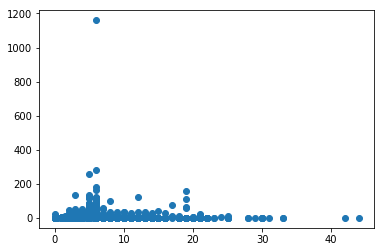

In [12]:
plt.scatter(df_compare["NumFloors"], df_compare["Number of Complaints"])
plt.show()

In [13]:
#Feature Selection Using Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

df_final.head()



,Number of Complaints,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,Occurence
0,0.0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,False
1,0.0,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,...,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,False
2,0.0,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,...,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,False
3,3.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,True
4,0.0,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,False


In [14]:
X = df_final[['BldgArea', 'BldgDepth', 'BuiltFAR',
       'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs',
       'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']] # features

y=df_final['Occurence']  # Labels

# feature labels
feat_labels = list(X.columns)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [15]:
# After splitting, train the model on the training set and perform predictions on the test set.

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [16]:
# After training, check the accuracy using actual and predicted values.
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.946882841150357


In [17]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
feature_imp = pd.Series(clf.feature_importances_,index=feat_labels).sort_values(ascending=False)
feature_imp

ResArea       0.162776
BuiltFAR      0.099286
BldgArea      0.094343
YCoord        0.085889
NumFloors     0.082483
XCoord        0.081154
Lot           0.069583
BldgDepth     0.063842
LotArea       0.062922
YearBuilt     0.045874
LotDepth      0.042765
ZipCode       0.026076
ResidFAR      0.021660
YearAlter1    0.017342
FacilFAR      0.014303
RetailArea    0.013285
NumBldgs      0.006672
OfficeArea    0.005287
CommFAR       0.004459
dtype: float64

No handles with labels found to put in legend.


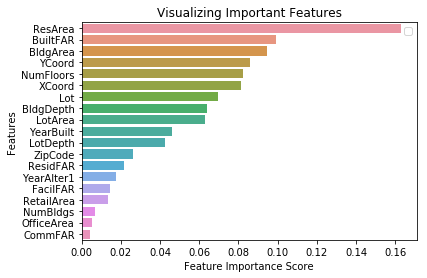

In [19]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [20]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.03)

In [21]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

BldgArea
BldgDepth
BuiltFAR
Lot
LotArea
LotDepth
NumFloors
ResArea
YearBuilt
YCoord
XCoord


In [22]:
!pip install xgboost==0.80

In [23]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9483111368461687

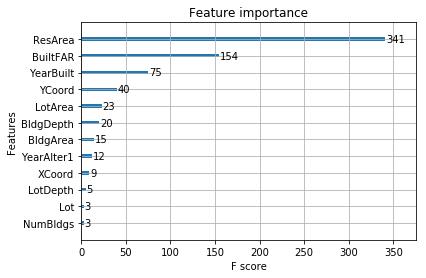

In [25]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import plot_importance

#model = XGBClassifier()
#model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
plt.show()